In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [18]:
data = pd.read_csv('C:/Users/91885/Desktop/train1.csv')
data.head(5)

,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,0,No,NaN,360.0,1.0,Y
1,Yes,1,No,128.0,360.0,1.0,N
2,Yes,0,Yes,66.0,360.0,1.0,Y
3,Yes,0,No,120.0,360.0,1.0,Y
4,No,0,No,141.0,360.0,1.0,Y


In [19]:
#data description
data.describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,578.000000,585.000000,551.000000
mean,146.799308,341.846154,0.843920
std,86.036717,65.738249,0.363261
min,17.000000,12.000000,0.000000
25%,100.000000,360.000000,1.000000
50%,128.000000,360.000000,1.000000
75%,168.000000,360.000000,1.000000
max,700.000000,480.000000,1.000000


In [ ]:
# drop a column from the DataFrame
data = data.drop('Loan_ID', axis=1)


In [21]:
data.isna()

,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
594,False,False,False,False,False,False,False
595,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False


In [22]:
# handling missing values
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [23]:
# encoding categorical variables using one-hot encoding
cat_vars = [ 'Married', 'Dependents', 'Self_Employed']
for var in cat_vars:
    data = pd.concat([data, pd.get_dummies(data[var], prefix=var)], axis=1)
    data.drop(var, axis=1, inplace=True)

In [24]:

# feature scaling
scaler = StandardScaler()
data['LoanAmount'] = scaler.fit_transform(data['LoanAmount'].values.reshape(-1,1))
data['Loan_Amount_Term'] = scaler.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1))


In [25]:
# splitting the dataset
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
# training the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluating the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8


Confusion matrix:
[[19 23]
 [ 1 77]]


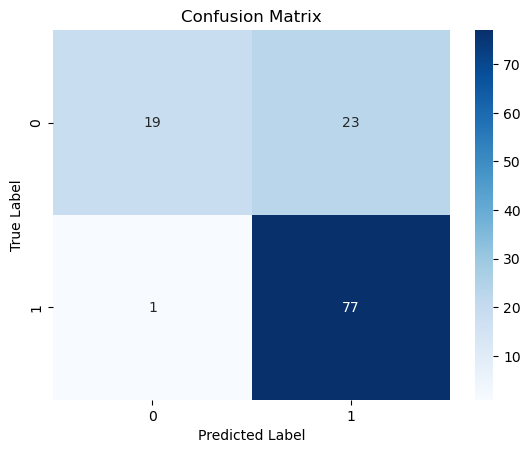

In [35]:
# generating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


# visualizing the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
# assuming that you already have generated the confusion matrix 'cm'
# using the predictions on the test set
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()# 'ravel' function flattens the confusion matrix into a 1D array
# with elements arranged in row-major (C-style) order
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 19
False Positives: 23
False Negatives: 1
True Positives: 77


In [38]:
#Recall Score
Recall = tp/(tp+fn)
print("Recall Score:",Recall)

Recall Score: 0.9871794871794872


In [41]:
#Precision Score
precision = tp / (tp + fp)
print("Precision Score:",precision)

Precision Score: 0.77


In [42]:
# F1 Score
f1 = 2 * (precision * Recall) / (precision + Recall)
print("F1 Score:",f1)

F1 Score: 0.8651685393258428
